In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""A class for storing, evaluating and plotting polynomials.

    Parameters
    ----------
    coef : ndarray-like of shape n
        The list of coeficients of the polynomial with degree n (a coventing used is the i-th element is of the list is coefficient of the i-th power)

    Attributes
    ----------

    coef_ : ndarray of shape n
        The list of coeficients of the polynomial
    
    degree_ : int
        Degree of the polynomial

    Examples
    --------

    coef = np.array([-1, 0, 0, 1])
    polynomial = Polynomial(coef)
    polynomial.show()
    polynomial.plot(xlim = [-2, 4])
"""

class Polynomial:
    
    def __init__(self, coef):
        self.coef_ = coef
        self.degree_ = len(coef)
        
    def show(self):
        text = f"P(x)={self.coef_[0]}"
        for i in range(1, self.degree_):
            text = text + f"+{self.coef_[i]}*x^{i}"
        print(text)
        
    def eval(self, x):
        return sum(self.coef_[i]*x**i for i in range(self.degree_))
    
    def plot(self, xlim, n = 1000, points = None, col = "blue"):
        x = np.linspace(xlim[0], xlim[1], n)
        plt.plot(x, self.eval(x), c = col)
        if points:
            plt.scatter(points[0], points[1], c = "red")
        
        plt.xlabel("x")
        plt.ylabel("f(x)")

In [3]:
""" Function for interpolation using Lagrange method.

    Parameters
    ----------
    x : ndarray-like of shape n
        x coordinates of points to interpolate

    y : ndarray-like of shape n
        y coordinates of points to interpolate

    Returns
    -------
    
    Polynomial(coef) : Polynomial
        The smallest degree polynomial interpolating all given points.

    Examples
    --------

    x = np.array([-1, 0, 1, 2])
    y = np.array([-2, -1, 0, 7])
    result = lagrange_interpolation(x, y)
    result.show()
    points = x, y
    result.plot([-1, 4], points = points)

    x = np.linspace(-1, 1, 11)
    y = 1/(1+25*x**2)
    result = lagrange_interpolation(x, y)
    result.show()
    points = x, y
    result.plot([-1, 1], points = points)

    n = 11
    x = np.array(np.sort([np.cos((2*i+1)/(2*n)*np.pi) for i in range(n)]))
    y = 1/(1+25*x**2)
    result = lagrange_interpolation(x, y)
    result.show()
    points = x, y
    result.plot([-1, 1], points = points)
    plt.show()
"""

def lagrange_interpolation(x, y):
    n = len(x)
    coef = np.empty(n)
    A = np.array([[x[j]**i for i in range(n)] for j in range(n)])
    print(A.shape)
    coef = np.linalg.solve(A, y)
    return Polynomial(coef)

(4, 4)
P(x)=-1.0+0.0*x^1+-0.0*x^2+1.0*x^3


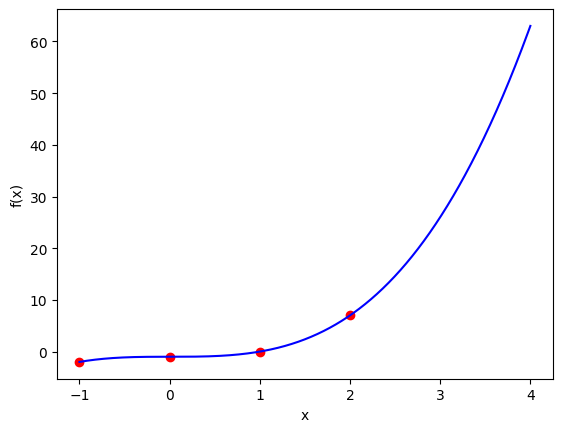

In [4]:
x = np.array([-1, 0, 1, 2])
y = np.array([-2, -1, 0, 7])
result = lagrange_interpolation(x, y)
result.show()
points = x, y
result.plot([-1, 4], points = points)

(11, 11)
P(x)=1.0000000000000053+-4.443335855776198e-14*x^1+-16.855203619909986*x^2+1.1009711660866135e-12*x^3+123.35972850679272*x^4+-6.960922138522803e-12*x^5+-381.4338235294363*x^6+1.2793585635328905e-11*x^7+494.9095022624834*x^8+-6.889201304334954e-12*x^9+-220.94174208146825*x^10


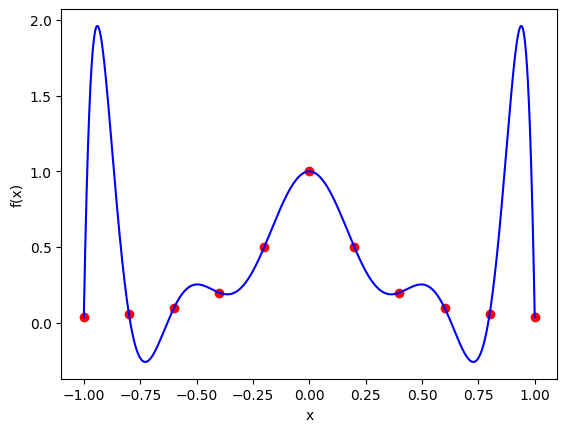

In [5]:
x = np.linspace(-1, 1, 11)
y = 1/(1+25*x**2)
result = lagrange_interpolation(x, y)
result.show()
points = x, y
result.plot([-1, 1], points = points)

(11, 11)
P(x)=1.0000000000000049+8.543506666330865e-15*x^1+-12.476511524283207*x^2+-5.305187297600974e-13*x^3+61.44301859274378*x^4+1.8978395466605407e-12*x^5+-133.44475553833115*x^6+-2.2404016856274786e-12*x^7+130.1058386748468*x^8+8.644324622075815e-13*x^9+-46.63291708775848*x^10


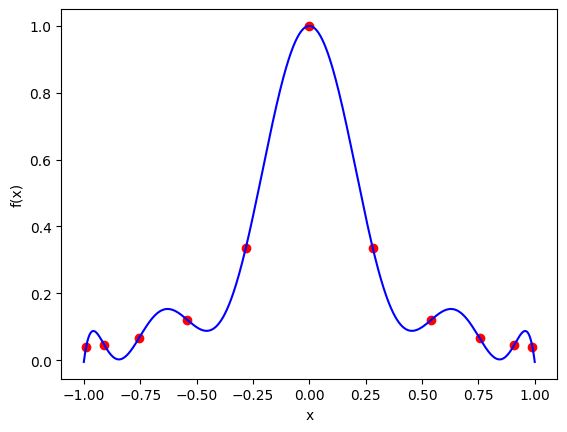

In [6]:
n = 11
x = np.array(np.sort([np.cos((2*i+1)/(2*n)*np.pi) for i in range(n)]))
y = 1/(1+25*x**2)
result = lagrange_interpolation(x, y)
result.show()
points = x, y
result.plot([-1, 1], points = points)
plt.show()

In [7]:
"""A class for storing, evaluating and plotting splains.

    Parameters
    ----------
    cubics : dictionary with tuples of 2 real numbers as keys and Polynomial objects with degree_=3 as values
        The dictionary with ranges on which a cubic is defined as keys and the cubics as values

    Attributes
    ----------

    cubics_ : dictionary with tuples of 2 real numbers as keys and Polynomial objects with degree_=3 as values
        The dictionary with ranges on which a cubic is defined as keys and the cubics as values
    
    splains_count_ : int
        Number of cubics

    Examples
    --------

    coef = np.array([-1, 0, 0, 1])
    polynomial = Polynomial(coef)
    polynomial.show()
    polynomial.plot(xlim = [-2, 4])
"""

class Splains:
    
    def __init__(self, cubics):
        self.cubics_ = cubics
        self.splains_count_ = len(cubics)
        
    def show(self, xlim):
        for x_range, cubic in self.cubics_.items():
            if x_range[0] < xlim[1] and x_range[1] > xlim[0]:
                print(f"On interval [{max(x_range[0], xlim[0])}, {min(x_range[1], xlim[1])}] the formula for the splain is:")
                cubic.show()
        
    def eval(self, x):
        for x_range, cubic in self.cubics_.items():
            if x_range[0] < x and x_range[1] > x:
                return cubic.eval(x)
    
    def plot(self, n = 1000, points = None, col = "blue"):
        for x_range, cubic in self.cubics_.items():
            cubic.plot(x_range, n = int(n/self.splains_count_), col = col)
    
        if points:
            plt.scatter(points[0], points[1], c="red")
    
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.show()

In [8]:
""" Function for interpolation using splains.

    Parameters
    ----------
    x : ndarray-like of shape n
        x coordinates of points to interpolate

    y : ndarray-like of shape n
        y coordinates of points to interpolate

    verbose : bool, default = False
        Verbosity mode
        
    Returns
    -------
    
    Splains(cubics) : Splains
        A class made of dictionary of cubic polynomials interpolating given points

    Examples
    --------

    x, y = ([1, 2, 3], [1, 2, 3])
    result = splains_interpolation(x, y, verbose = True)
    points = x, y
    result.plot(points = points)
    
    x = np.linspace(-1, 1, 11)
    y = 1/(1+25*x**2)
    result = splains_interpolation(x, y, verbose = False)
    points = x, y
    result.plot(points = points)
"""

def splains_interpolation(x, y, verbose = False):
    n = len(x)
    if verbose:
        print(f"n={n}, expected number of equations = {4*n-4}")
    cubics = {}
    A = np.zeros((4*n-4, n-1, 4))
    b = np.zeros(4*n-4)
    
    if verbose:
            print(f"0-th condition for 0-th splain's coefficients:")
            print(f"{np.array([0, 0, 2, 6*x[0]])}*[p_0, p_1, p_2, p_3]=0")
    A[0, 0, :]   = np.array([0, 0, 2, 6*x[0]])

    if verbose:
            print(f"1-th condition for {n-2}-th splain's coefficients:")
            print(f"{np.array([0, 0, 2, 6*x[n-1]])}*[p_0, p_1, p_2, p_3]=0")
    A[1, n-2, :] = np.array([0, 0, 2, 6*x[n-1]])
    if verbose:
            print(f"Code successfully entered into the main loop.")
        
    for i in range(n-1):
        if verbose:
            print(f"{2+i}-th condition for {i}-th splain's coefficients:")
            print(f"{np.array([x[i]**j for j in range(4)])}*[p_0, p_1, p_2, p_3]={y[i]}")
        A[2+i, i, :] = np.array([x[i]**j for j in range(4)])
        b[2+i] = y[i]
    for i in range(n-1):
        if verbose:
            print(f"{i+n+1}-th condition for {i}-th splain's coefficients:")
            print(f"{np.array([x[i+1]**j for j in range(4)])}*[p_0, p_1, p_2, p_3]={y[i+1]}")
        A[i+n+1, i, :] = np.array([x[i+1]**j for j in range(4)])
        b[i+n+1] = y[i+1]

    for i in range(n-2):
        if verbose:
            print(f"{i+2*n}-th condition for coefficients of {i}-th  and {i+1}-th splains (named p and q):")
            print(f"{np.array([0, 1, 2*x[i+1], 3*x[i+1]**2])}*[p_0, p_1, p_2, p_3]+{np.array([0, -1, -2*x[i+1], -3*x[i+1]**2])}*[q_0, q_1, q_2, q_3]=0")
        A[i+2*n, i, :] = np.array([0, 1, 2*x[i+1], 3*x[i+1]**2])
        A[i+2*n, i+1, :] = np.array([0, -1, -2*x[i+1], -3*x[i+1]**2])
        
    for i in range(n-2):
        if verbose:
            print(f"{i+3*n-2}-th condition for coefficients of {i}-th  and {i+1}-th splains (named p and q):")
            print(f"{np.array([0, 0, 2, 6*x[i+1]])}*[p_0, p_1, p_2, p_3]+{np.array([0, 0, -2, -6*x[i+1]])}*[q_0, q_1, q_2, q_3]=0")
        A[i+3*n-2, i, :] = np.array([0, 0, 2, 6*x[i+1]])
        A[i+3*n-2, i+1, :] = np.array([0, 0, -2, -6*x[i+1]])

    A_matrix = A.reshape((A.shape[0], -1))
    if verbose:
            print(f"Reshaped tensor A into matrix:\n{A_matrix}")
    coef_list = np.linalg.solve(A_matrix, b)
    if verbose:
            print(f"Found list of coefficients:\n{coef_list}")
    for i in range(n-1):
        cubics[(x[i], x[i+1])] = Polynomial(coef_list[4*i:4*i+4])
    return Splains(cubics)

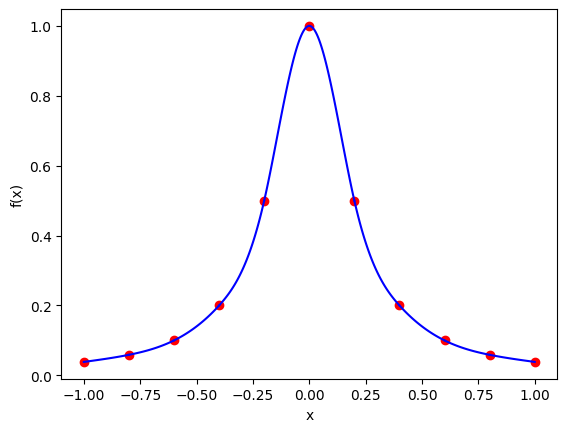

In [9]:
x = np.linspace(-1, 1, 11)
y = 1/(1+25*x**2)
#x, y = ([1, 2, 3], [1, 2, 3])
result = splains_interpolation(x, y, verbose = False)
points = x, y
result.plot(points = points)